In [1]:
pip install pandas matplotlib seaborn xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 84.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [5]:
# Load validation set and prediction results
val_df = pd.read_csv('../data/sample_val.csv')
pred_df = pd.read_csv('../output/prediction.csv')  # Adjust path if needed

# Merge ground truth and predictions
merged_df = pd.merge(val_df, pred_df, on=['user_id', 'business_id'])
merged_df.columns = ['user_id', 'business_id', 'true_rating', 'predicted_rating']

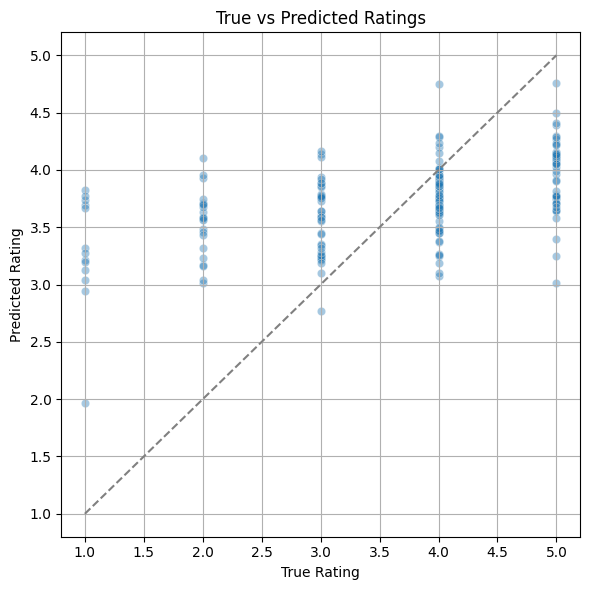

In [6]:
# 1. Scatter Plot: True vs Predicted Ratings
plt.figure(figsize=(6, 6))
sns.scatterplot(data=merged_df, x='true_rating', y='predicted_rating', alpha=0.4)
plt.plot([1, 5], [1, 5], '--', color='gray')  # Ideal prediction line
plt.xlabel('True Rating')
plt.ylabel('Predicted Rating')
plt.title('True vs Predicted Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()

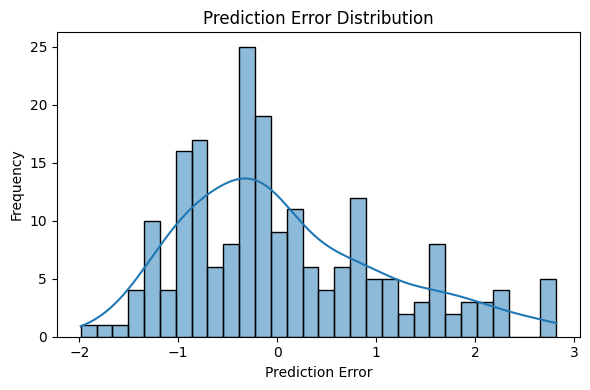

In [7]:
# 2. Histogram: Prediction Errors
merged_df['error'] = merged_df['predicted_rating'] - merged_df['true_rating']
plt.figure(figsize=(6, 4))
sns.histplot(merged_df['error'], kde=True, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

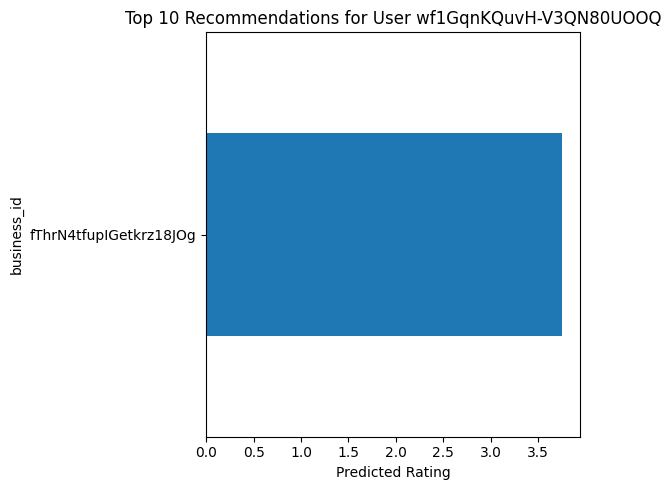

In [8]:
# 3. Top-N Recommendations for a Sample User
sample_user = merged_df['user_id'].iloc[0]
top_n = merged_df[merged_df['user_id'] == sample_user].sort_values(by='predicted_rating', ascending=False).head(10)
top_n_plot = top_n[['business_id', 'predicted_rating']].set_index('business_id')

top_n_plot.plot(kind='barh', legend=False, figsize=(6, 5))
plt.xlabel('Predicted Rating')
plt.title(f'Top 10 Recommendations for User {sample_user}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [10]:
# 4. Feature Importance Plot (if XGBoost model is available)
try:
    booster = xgb.Booster()
    booster.load_model('../model/xgb_model.bin')  # Adjust path if needed
    importance = booster.get_score(importance_type='weight')
    imp_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
    imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)

    sns.barplot(x='Importance', y='Feature', data=imp_df)
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
except:
    print("XGBoost model not found or path is incorrect.")

XGBoost model not found or path is incorrect.
